# Script to divide image data into train and test directory

 - `./train/food` : Training data, image of food 
 - `./train/no_food` : Training data, image of no-food
 - `./valid/food` : Validation data, image of food
 - `./valid/no_food` : Validation data, image of no-food
 - `./test/food` : Test data, image of food
 - `./test/no_food` : Test data, image of no-food
 

In [10]:
import os
import numpy as np
from os import listdir
import random
import shutil

import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

%matplotlib inline

In [11]:
base_dir = os.getcwd()
print(base_dir)

/home/chieko/Projects/Food_project


In [12]:
def rgba_to_jpg(rgba_img):
    # https://stackoverflow.com/questions/9166400/convert-rgba-png-to-rgb-with-pil
    
    # print(" <In rgba_to_jpg> : {}".format(filename))
    background = Image.new('RGBA', rgba_img.size, (255,255,255))
    
    alpha_composite = Image.alpha_composite(background, rgba_img)
    
    return alpha_composite.convert('RGB')

    

def copy_files(dirname):
    category = os.path.basename(dirname)
    path = os.path.dirname(dirname)
    
    orig_files = [f for f in listdir(dirname) if os.path.isfile(os.path.join(dirname, f))]
    print("Number of images : {}".format(len(orig_files)))
    
    # Shuffle the sequence
    random.shuffle(orig_files) 
    
    # Train 80%, valid 10%, test 10%
    train_num = len(orig_files)*0.8
    valid_num = len(orig_files)*0.1
    
    for i, f in enumerate(orig_files):
        orig_file = os.path.join(dirname, f)
        
        if i < train_num:
            to_dir = os.path.join(os.path.join(path, 'train'), category)

        elif i >= train_num and i < train_num + valid_num:
            to_dir = os.path.join(os.path.join(path, 'valid'), category)

        else:
            to_dir = os.path.join(os.path.join(path, 'test'), category)

    
        # resize image if it's too big (larger than 640px at the longest edge)
        MAXLEN = 640
       
        im = Image.open(orig_file)
        w, h = im.size
        maxedge = max((w, h))
        if maxedge > MAXLEN:
            r = MAXLEN / maxedge
            new_w = int(w * r)
            new_h = int(h * r)
            im = im.resize((new_w, new_h)) 
        
        # Check mode and convert into JPG, also rename filename to ".jpg"
        if im.mode == 'RGBA':          
            im = rgba_to_jpg(im)
            new_fname = f.split('.')[0] + ".jpg"
            print(" <RGBA> : {} -> {}".format(f, new_fname))
            
        elif im.mode == 'P':
            im = im.convert("RGB")
            new_fname = f.split('.')[0] + ".jpg"
            print(" <P> : {} -> {}".format(f, new_fname))
            
        else:
            ext = f.split('.')[1]
            if im.mode == 'RGB' and \
               ext != "jpg" and ext != "jpeg" and ext != "JPG" and ext != "JPEG":               
                new_fname = f.split('.')[0] + ".jpg"
                print(" <rename> : {} -> {}".format(f, new_fname))
            else:
                new_fname = f
            
        im.save(os.path.join(to_dir, new_fname), "JPEG")
        
        
        if i%500 == 0:
            print(". ", end = '')

    return

In [13]:
orig_food_dir = os.path.join(base_dir, 'food')
orig_nofood_dir = os.path.join(base_dir, 'no_food')

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

train_food_dir = os.path.join(train_dir, 'food')
train_nofood_dir = os.path.join(train_dir, 'no_food')

valid_food_dir = os.path.join(valid_dir, 'food')
valid_nofood_dir = os.path.join(valid_dir, 'no_food')

test_food_dir = os.path.join(test_dir, 'food')
test_nofood_dir = os.path.join(test_dir, 'no_food')

# Make data directories. If exist, remove contents and remake it
if os.path.exists(train_food_dir):
    shutil.rmtree(train_food_dir)
os.makedirs(train_food_dir)
    
if os.path.exists(train_nofood_dir):
    shutil.rmtree(train_nofood_dir)
os.makedirs(train_nofood_dir)

if os.path.exists(valid_food_dir):
    shutil.rmtree(valid_food_dir)
os.makedirs(valid_food_dir)
    
if os.path.exists(valid_nofood_dir):
    shutil.rmtree(valid_nofood_dir)
os.makedirs(valid_nofood_dir)    
    
if os.path.exists(test_food_dir):
    shutil.rmtree(test_food_dir)
os.makedirs(test_food_dir)

if os.path.exists(test_nofood_dir):
    shutil.rmtree(test_nofood_dir)
os.makedirs(test_nofood_dir)


print("Making FOOD data started!")
copy_files(orig_food_dir)
print("\nFinished!")
   
print("")

print("Making NO FOOD data started!")
copy_files(orig_nofood_dir)
print("\nFinished!")    
        

Making FOOD data started!
Number of images : 5206
.  <P> : lunch_jpn_000440.gif -> lunch_jpn_000440.jpg
 <rename> : dinner_000186.png -> dinner_000186.jpg
 <RGBA> : lunch_000552.png -> lunch_000552.jpg
 <P> : lunch_jpn_000112.gif -> lunch_jpn_000112.jpg
 <RGBA> : food_jpn_000184.png -> food_jpn_000184.jpg
 <rename> : food_jpn_000369.png -> food_jpn_000369.jpg
 <RGBA> : popular_food_000263.png -> popular_food_000263.jpg
 <rename> : brekkie_000538.png -> brekkie_000538.jpg
 <RGBA> : brekkie_jpn_000293.png -> brekkie_jpn_000293.jpg
 <P> : food_jpn_000521.png -> food_jpn_000521.jpg
 <RGBA> : dinner_000498.png -> dinner_000498.jpg
 <rename> : food_jpn_000582.png -> food_jpn_000582.jpg
 <RGBA> : lunch_000284.png -> lunch_000284.jpg
 <rename> : popular_food_000468.png -> popular_food_000468.jpg
 <RGBA> : food_jpn_000535.png -> food_jpn_000535.jpg
 <rename> : lunch_000459.png -> lunch_000459.jpg
 <RGBA> : popular_food_000399.png -> popular_food_000399.jpg
 <P> : lunch_jpn_000526.gif -> lunch_j

 <P> : lunch_000492.png -> lunch_000492.jpg
 <P> : brekkie_jpn_000320.png -> brekkie_jpn_000320.jpg
 <RGBA> : food_jpn_000011.png -> food_jpn_000011.jpg
 <RGBA> : brekkie_000153.PNG -> brekkie_000153.jpg
 <P> : popular_food_000532.jpg -> popular_food_000532.jpg
 <RGBA> : food_000421.jpg -> food_000421.jpg
 <rename> : food_jpn_000475.png -> food_jpn_000475.jpg
 <rename> : lunch_000086.png -> lunch_000086.jpg
 <RGBA> : lunch_jpn_000049.jpg -> lunch_jpn_000049.jpg
 <rename> : lunch_jpn_000269.png -> lunch_jpn_000269.jpg
 <rename> : brekkie_000285.png -> brekkie_000285.jpg
 <P> : brekkie_jpn_000294.png -> brekkie_jpn_000294.jpg
 <rename> : popular_recipe_jpn_000077.png -> popular_recipe_jpn_000077.jpg
 <P> : food_jpn_000014.png -> food_jpn_000014.jpg
 <rename> : lunch_jpn_000302.png -> lunch_jpn_000302.jpg
 <RGBA> : lunch_jpn_000068.jpg -> lunch_jpn_000068.jpg
 <RGBA> : jamie_food_000111.png -> jamie_food_000111.jpg
 <RGBA> : food_000184.png -> food_000184.jpg
 <RGBA> : lunch_jpn_000355.pn

 <RGBA> : zakka_000286.png -> zakka_000286.jpg
 <RGBA> : animals_000561.png -> animals_000561.jpg
 <RGBA> : misc_000191.png -> misc_000191.jpg
 <rename> : building_jpn_000279.png -> building_jpn_000279.jpg
 <RGBA> : garden_000044.png -> garden_000044.jpg
 <rename> : nature_000238.png -> nature_000238.jpg
 <RGBA> : nature_000560.png -> nature_000560.jpg
 <RGBA> : animals_000329.png -> animals_000329.jpg
 <P> : furniture_000512.png -> furniture_000512.jpg
 <rename> : city_000098.png -> city_000098.jpg
 <RGBA> : people_000196.png -> people_000196.jpg
.  <rename> : building_jpn_000336.png -> building_jpn_000336.jpg
 <RGBA> : furniture_000067.png -> furniture_000067.jpg
 <rename> : furniture_000290.png -> furniture_000290.jpg
 <RGBA> : city_000121.jpg -> city_000121.jpg
 <RGBA> : garden_000056.png -> garden_000056.jpg
 <rename> : flowers_000089.png -> flowers_000089.jpg
 <P> : flowers_000452.gif -> flowers_000452.jpg
 <rename> : zakka_000109.png -> zakka_000109.jpg
 <RGBA> : building_jpn_00

In [14]:
print("Number of train data (food) = " + str(len(listdir(train_food_dir))))
print("Number of train data (No food) = " + str(len(listdir(train_nofood_dir))))
print("Number of validation data (food) = " + str(len(listdir(valid_food_dir))))
print("Number of validation data (No food) = " + str(len(listdir(valid_nofood_dir))))
print("Number of test data (food) = " + str(len(listdir(test_food_dir))))
print("Number of test data (No food) = " + str(len(listdir(test_nofood_dir))))

Number of train data (food) = 4165
Number of train data (No food) = 4046
Number of validation data (food) = 521
Number of validation data (No food) = 507
Number of test data (food) = 520
Number of test data (No food) = 506


file: /home/chieko/Projects/Food_project/train/food/food_jpn_000155.jpg, h = 311, w = 640
file: /home/chieko/Projects/Food_project/train/food/dinner_jpn_000186.jpg, h = 442, w = 590
file: /home/chieko/Projects/Food_project/train/food/popular_recipe_jpn_000361.jpg, h = 200, w = 200
file: /home/chieko/Projects/Food_project/train/food/dinner_000433.jpg, h = 480, w = 640
file: /home/chieko/Projects/Food_project/train/food/popular_food_000445.jpg, h = 330, w = 300
file: /home/chieko/Projects/Food_project/train/food/dinner_jpn_000364.jpg, h = 453, w = 617
file: /home/chieko/Projects/Food_project/train/food/food_000392.jpg, h = 300, w = 300
file: /home/chieko/Projects/Food_project/train/food/dinner_jpn_000169.jpg, h = 640, w = 480
file: /home/chieko/Projects/Food_project/train/food/food_jpn_000166.jpg, h = 640, w = 426
file: /home/chieko/Projects/Food_project/train/food/brekkie_jpn_000473.jpg, h = 640, w = 640


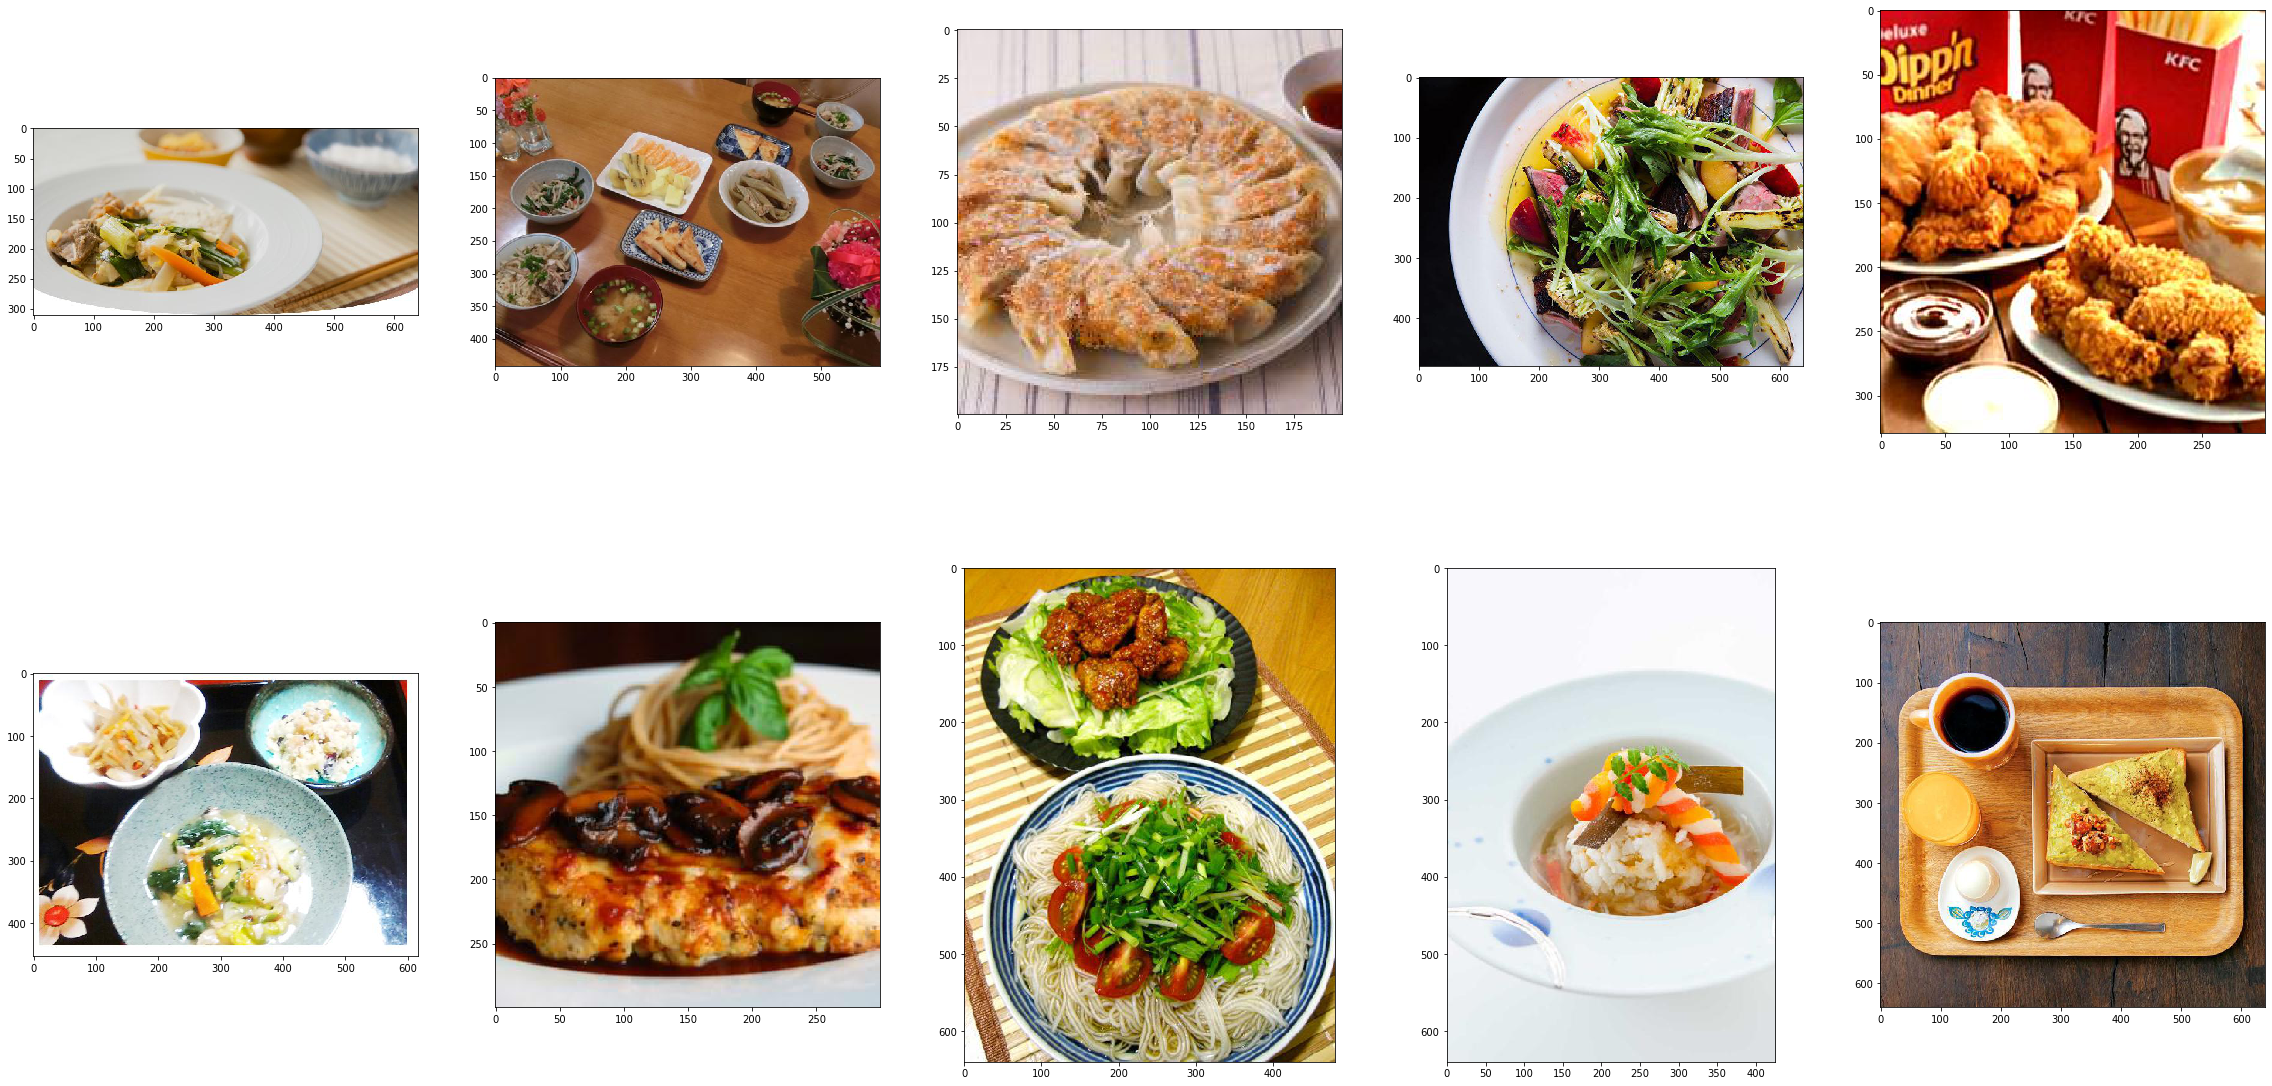

In [15]:
import matplotlib.image as mpimg

show_imgs = [os.path.join(train_food_dir, f) for f in listdir(train_food_dir)[:10]]

fig = plt.figure(figsize=(40,20))
#fig.set_size_inches(2 * 4, 5 * 4)

for i, img_path in enumerate(show_imgs):
    # read as RBG
    img = mpimg.imread(img_path)
    h, w, _ = img.shape
    print("file: {}, h = {}, w = {}".format(img_path, h, w))
    a = fig.add_subplot(2, 5, i+1)
    plt.imshow(img)

plt.show()